In [11]:
#The aim of this post is to analyze what people think about the second lockdown in London
#Install libraries
#!pip install textblob
#!pip install tweepy
#!pip install pycountry
#!pip install langdetect
!pip install numpy==1.15.4

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 22.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [39]:
# Import Libraries for sentiment Ananlysis
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import pycountry
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
#Authentication
consumerKey = "eqn0cIEHNY6Y7BMmMzTrKljfd"
consumerSecret = "MTRiGQPXOSsqc6Eas7CVLBgRWMjizVjjN5xDEERjNhJhfbsLpS"
accessToken = "877454323231358978-lq7tCwHtPcOgvtboX6DtnjzJEJ5arJ6"
accessTokenSecret = "C5peejXi8vh2d9OZCDrDMSdD4MRwipxhcDuKKKwoDXzKv"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

After your authentication, you need to use tweepy to get text and use Textblob to calculate positive, negative, neutral, polarity and compound parameters from the text.

In [11]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))
tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
 
 #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
if neg > pos:
    negative_list.append(tweet.text)
    negative += 1
elif pos > neg:
    positive_list.append(tweet.text)
    positive += 1
elif pos == neg:
    neutral_list.append(tweet.text)
    neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: Igbos
Please enter how many tweets to analyze: 3000


In [31]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...


True

In [12]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  3000
positive number:  1
negative number:  0
neutral number:  0


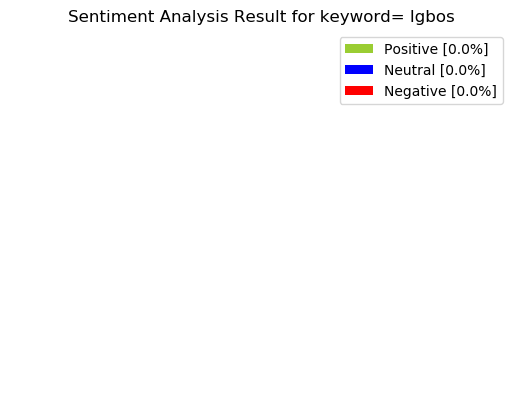

In [13]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()

In [14]:
tweet_list.tail()

,0
2995,RT @517p705: Someone should please check on Ch...
2996,RT @JaypeeGeneral: Na this Enugu State wey Chi...
2997,RT @JaypeeGeneral: Na this Enugu State wey Chi...
2998,RT @PO_GrassRootM: Strategic meeting between F...
2999,RT @T_akinpade: Atiku doesn't want Northerners...


In [15]:
#cleaning tweets
tweet_list.drop_duplicates(inplace = True)

In [23]:
tweet_list

,0,text
0,RT @Eloka51: Not really bothered about what pe...,RT @Eloka51: Not really bothered about what pe...
1,RT @Yinkalead9ja: Dey do like dog wey just won...,RT @Yinkalead9ja: Dey do like dog wey just won...
2,RT @firstladyship: Tinubu took his time to ins...,RT @firstladyship: Tinubu took his time to ins...
3,"@DanladiIliya1 @SaharaReporters His company, n...","@DanladiIliya1 @SaharaReporters His company, n..."
5,@olasam316 @DavidHundeyin The agitation will c...,@olasam316 @DavidHundeyin The agitation will c...
...,...,...
2982,@PoojaMedia You guys hope to incite war betwee...,@PoojaMedia You guys hope to incite war betwee...
2987,RT @OjiUgo_nwa: Thiefnubu a known identity thi...,RT @OjiUgo_nwa: Thiefnubu a known identity thi...
2988,Buhari - \nIgbos are Dot-in-a-circle\nI will d...,Buhari - \nIgbos are Dot-in-a-circle\nI will d...
2990,@OfficialPigo @TheBATgangan This Mentality is ...,@OfficialPigo @TheBATgangan This Mentality is ...


In [26]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([⁰-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
#tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @Eloka51: Not really bothered about what pe...,rt @eloka51: not really bothered about what pe...
1,RT @Yinkalead9ja: Dey do like dog wey just won...,rt @yinkalead9ja: dey do like dog wey just won...
2,RT @firstladyship: Tinubu took his time to ins...,rt @firstladyship: tinubu took his time to ins...
3,"@DanladiIliya1 @SaharaReporters His company, n...","@danladiiliya1 @saharareporters his company, n..."
5,@olasam316 @DavidHundeyin The agitation will c...,@olasam316 @davidhundeyin the agitation will c...
6,@_opyzyle Is Brymo a separatist? How do u comp...,@_opyzyle is brymo a separatist? how do u comp...
7,RT @EniyeAmeze: Hmmm??? People can gossip.\nTh...,rt @eniyeameze: hmmm??? people can gossip.\nth...
8,It is so appalling and pathetic the amount of ...,it is so appalling and pathetic the amount of ...
9,@kndoluwafemi @BrymOlawale Have you signed pet...,@kndoluwafemi @brymolawale have you signed pet...
11,RT @PO_GrassRootM: Strategic meeting between F...,rt @po_grassrootm: strategic meeting between f...


In [27]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
        tw_list.loc[index, 'neg'] = neg
        tw_list.loc[index, 'neu'] = neu
        tw_list.loc[index, 'pos'] = pos
        tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @Eloka51: Not really bothered about what pe...,rt @eloka51: not really bothered about what pe...,0.250000,0.600000,positive,NaN,NaN,NaN,NaN
1,RT @Yinkalead9ja: Dey do like dog wey just won...,rt @yinkalead9ja: dey do like dog wey just won...,-0.150000,0.333333,positive,NaN,NaN,NaN,NaN
2,RT @firstladyship: Tinubu took his time to ins...,rt @firstladyship: tinubu took his time to ins...,0.000000,0.625000,negative,NaN,NaN,NaN,NaN
3,"@DanladiIliya1 @SaharaReporters His company, n...","@danladiiliya1 @saharareporters his company, n...",0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
5,@olasam316 @DavidHundeyin The agitation will c...,@olasam316 @davidhundeyin the agitation will c...,0.000000,0.000000,negative,NaN,NaN,NaN,NaN
6,@_opyzyle Is Brymo a separatist? How do u comp...,@_opyzyle is brymo a separatist? how do u comp...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
7,RT @EniyeAmeze: Hmmm??? People can gossip.\nTh...,rt @eniyeameze: hmmm??? people can gossip.\nth...,0.175000,0.325000,positive,NaN,NaN,NaN,NaN
8,It is so appalling and pathetic the amount of ...,it is so appalling and pathetic the amount of ...,-0.716667,0.933333,negative,NaN,NaN,NaN,NaN
9,@kndoluwafemi @BrymOlawale Have you signed pet...,@kndoluwafemi @brymolawale have you signed pet...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
11,RT @PO_GrassRootM: Strategic meeting between F...,rt @po_grassrootm: strategic meeting between f...,0.000000,0.000000,negative,NaN,NaN,NaN,NaN


In [28]:
tw_list.tail()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
2982,@PoojaMedia You guys hope to incite war betwee...,@poojamedia you guys hope to incite war betwee...,0.0,0.000000,negative,NaN,NaN,NaN,NaN
2987,RT @OjiUgo_nwa: Thiefnubu a known identity thi...,rt @ojiugo_nwa: thiefnubu a known identity thi...,0.0,0.000000,negative,NaN,NaN,NaN,NaN
2988,Buhari - \nIgbos are Dot-in-a-circle\nI will d...,buhari - \nigbos are dot-in-a-circle\ni will d...,0.0,0.000000,neutral,0.0,1.0,0.0,0.0
2990,@OfficialPigo @TheBATgangan This Mentality is ...,@officialpigo @thebatgangan this mentality is ...,0.0,0.000000,neutral,0.0,1.0,0.0,0.0
2991,@Spotlight_Abby The simple truth is that no se...,@spotlight_abby the simple truth is that no se...,0.0,0.357143,positive,NaN,NaN,NaN,NaN


In [80]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [30]:
#fucntion for counting values in a single column
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
negative,346,36.73
positive,324,34.39
neutral,272,28.87


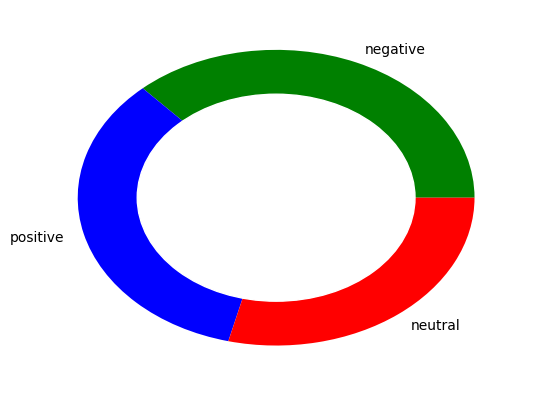

In [35]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names = pc.index
size = pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [65]:
#creating wordcloud for all tweets
word_cloud = WordCloud(collocations=False, background_color='white').generate(tw_list_new)

In [64]:
tw_list_new = tw_list['text'].sum()
tw_list_new

'rt @eloka51: not really bothered about what people say about igbos again. this is nigeria. my own is that igbo people, please collect your…rt @yinkalead9ja: dey do like dog wey just won mate for the first time \U0001fae3\U0001fae3\U0001fae3\U0001fae3\U0001fae3 \n\nchukwuemeka ~ red card ~ aubameyang ~ bad to me ~ jao felix…rt @firstladyship: tinubu took his time to insult the entire south east with “soaked bread” in enugu. he did that in the presence of hope u…@danladiiliya1 @saharareporters his company, not government property. i wonder how closure of a mans enterprise aff… https://t.co/he3qgjn5m1@olasam316 @davidhundeyin the agitation will continue. igbos are not a one dimensional people. they have independen… https://t.co/felbkhwuju@_opyzyle is brymo a separatist? how do u compare the two? you get sense at all. what did u do when the oba of lago… https://t.co/pyabamt9fart @eniyeameze: hmmm??? people can gossip.\nthey said peter obi\'s mom looks younger than tinubu. is it true?\n𝗙𝗮𝘀

In [66]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  2.2.3


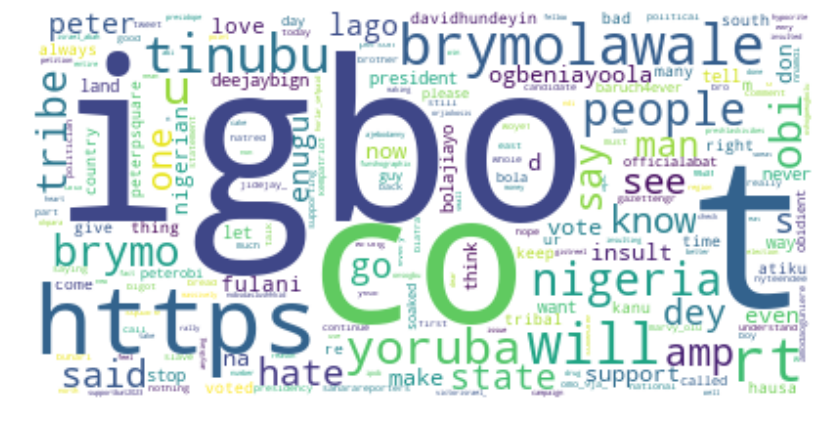

In [68]:
plt.figure(figsize=(14, 18))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [73]:
#Creating wordcloud for positive sentiment
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_positive

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @Eloka51: Not really bothered about what pe...,rt @eloka51: not really bothered about what pe...,0.250,0.600000,positive,NaN,NaN,NaN,NaN
1,RT @Yinkalead9ja: Dey do like dog wey just won...,rt @yinkalead9ja: dey do like dog wey just won...,-0.150,0.333333,positive,NaN,NaN,NaN,NaN
7,RT @EniyeAmeze: Hmmm??? People can gossip.\nTh...,rt @eniyeameze: hmmm??? people can gossip.\nth...,0.175,0.325000,positive,NaN,NaN,NaN,NaN
15,RT @Chinedu74081213: All the hate about igbos ...,rt @chinedu74081213: all the hate about igbos ...,-0.800,0.900000,positive,NaN,NaN,NaN,NaN
17,RT @_HREmpress: If Brymo must apologize to the...,rt @_hrempress: if brymo must apologize to the...,0.200,0.400000,positive,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2951,The list does not include Igbos from Nigeria w...,the list does not include igbos from nigeria w...,0.250,0.562500,positive,NaN,NaN,NaN,NaN
2962,@semite007 @its_murfy @olawoyinolaniy1 @Horlar...,@semite007 @its_murfy @olawoyinolaniy1 @horlar...,0.800,1.000000,positive,NaN,NaN,NaN,NaN
2978,"People think base on there on interest, it's n...","people think base on there on interest, it's n...",-0.300,0.888889,positive,NaN,NaN,NaN,NaN
2981,"Absolutely, the igbos can't govern this countr...","absolutely, the igbos can't govern this countr...",0.200,0.900000,positive,NaN,NaN,NaN,NaN


In [82]:
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_negative

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
2,RT @firstladyship: Tinubu took his time to ins...,rt @firstladyship: tinubu took his time to ins...,0.000000,0.625000,negative,NaN,NaN,NaN,NaN
5,@olasam316 @DavidHundeyin The agitation will c...,@olasam316 @davidhundeyin the agitation will c...,0.000000,0.000000,negative,NaN,NaN,NaN,NaN
8,It is so appalling and pathetic the amount of ...,it is so appalling and pathetic the amount of ...,-0.716667,0.933333,negative,NaN,NaN,NaN,NaN
11,RT @PO_GrassRootM: Strategic meeting between F...,rt @po_grassrootm: strategic meeting between f...,0.000000,0.000000,negative,NaN,NaN,NaN,NaN
14,Have the guts to call us useless people with e...,have the guts to call us useless people with e...,-0.500000,0.200000,negative,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2965,NDIGBO NDONU!\nSORRY FOR U IGBOS!!\nEVERYBODY ...,ndigbo ndonu!\nsorry for u igbos!!\neverybody ...,-0.781250,1.000000,negative,NaN,NaN,NaN,NaN
2971,@akunnachux It's within their rights. Unfortun...,@akunnachux it's within their rights. unfortun...,-0.500000,1.000000,negative,NaN,NaN,NaN,NaN
2977,@JummyElsie @olawoyinolaniy1 @SaharaReporters ...,@jummyelsie @olawoyinolaniy1 @saharareporters ...,0.000000,0.000000,negative,NaN,NaN,NaN,NaN
2982,@PoojaMedia You guys hope to incite war betwee...,@poojamedia you guys hope to incite war betwee...,0.000000,0.000000,negative,NaN,NaN,NaN,NaN


In [83]:
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]
tw_list_neutral

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
3,"@DanladiIliya1 @SaharaReporters His company, n...","@danladiiliya1 @saharareporters his company, n...",0.0,0.000,neutral,0.0,1.0,0.0,0.0
6,@_opyzyle Is Brymo a separatist? How do u comp...,@_opyzyle is brymo a separatist? how do u comp...,0.0,0.000,neutral,0.0,1.0,0.0,0.0
9,@kndoluwafemi @BrymOlawale Have you signed pet...,@kndoluwafemi @brymolawale have you signed pet...,0.0,0.000,neutral,0.0,1.0,0.0,0.0
12,RT @DavidHundeyin: Let it also be known that t...,rt @davidhundeyin: let it also be known that t...,0.0,0.625,neutral,0.0,1.0,0.0,0.0
16,#Igbos https://t.co/ib5ubNiYBZ,#igbos https://t.co/ib5ubniybz,0.0,0.000,neutral,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2954,@Articlessugar @BrymOlawale Oh man come off it...,@articlessugar @brymolawale oh man come off it...,0.0,1.000,neutral,0.0,1.0,0.0,0.0
2958,"@Donchukexon1 Read my tweet again, I said hist...","@donchukexon1 read my tweet again, i said hist...",0.0,0.000,neutral,0.0,1.0,0.0,0.0
2969,@OMO_9JA_ @KemPatriot @Marvy_olu @NyteenDee @w...,@omo_9ja_ @kempatriot @marvy_olu @nyteendee @w...,0.0,0.000,neutral,0.0,1.0,0.0,0.0
2988,Buhari - \nIgbos are Dot-in-a-circle\nI will d...,buhari - \nigbos are dot-in-a-circle\ni will d...,0.0,0.000,neutral,0.0,1.0,0.0,0.0


In [84]:
#Calculating tweet’s lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,132.55
neutral,128.24
positive,132.61


In [86]:
#text count
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,20.21
neutral,18.42
positive,20.49


In [87]:
#Removing Punctuation
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0–9]+', '', text)
    return text
tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @Eloka51: Not really bothered about what pe...,rt @eloka51: not really bothered about what pe...,0.25,0.600000,positive,NaN,NaN,NaN,NaN,139,24,rt eloka51 not really bothered about what peop...,"[rt, eloka51, not, really, bothered, about, wh...","[rt, eloka51, really, bothered, people, say, i...","[rt, eloka51, realli, bother, peopl, say, igbo..."
1,RT @Yinkalead9ja: Dey do like dog wey just won...,rt @yinkalead9ja: dey do like dog wey just won...,-0.15,0.333333,positive,NaN,NaN,NaN,NaN,139,28,rt yinkaleadja dey do like dog wey just won ma...,"[rt, yinkaleadja, dey, do, like, dog, wey, jus...","[rt, yinkaleadja, dey, like, dog, wey, mate, f...","[rt, yinkaleadja, dey, like, dog, wey, mate, f..."
2,RT @firstladyship: Tinubu took his time to ins...,rt @firstladyship: tinubu took his time to ins...,0.00,0.625000,negative,NaN,NaN,NaN,NaN,140,26,rt firstladyship tinubu took his time to insul...,"[rt, firstladyship, tinubu, took, his, time, t...","[rt, firstladyship, tinubu, took, time, insult...","[rt, firstladyship, tinubu, took, time, insult..."
3,"@DanladiIliya1 @SaharaReporters His company, n...","@danladiiliya1 @saharareporters his company, n...",0.00,0.000000,neutral,0.0,1.0,0.0,0.0,140,17,danladiiliya1 saharareporters his company not ...,"[danladiiliya1, saharareporters, his, company,...","[danladiiliya1, saharareporters, company, gove...","[danladiiliya1, saharareport, compani, govern,..."
5,@olasam316 @DavidHundeyin The agitation will c...,@olasam316 @davidhundeyin the agitation will c...,0.00,0.000000,negative,NaN,NaN,NaN,NaN,140,17,olasam316 davidhundeyin the agitation will con...,"[olasam316, davidhundeyin, the, agitation, wil...","[olasam316, davidhundeyin, agitation, continue...","[olasam316, davidhundeyin, agit, continu, igbo..."


In [90]:
#Appliyng Countvectorizer to see unique words
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())
#1281 Number of reviews has 2966 words
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

942 Number of reviews has 3704 words


,,aa,aajessehalliday,aba,abaji,abandon,abarib,abati,abayomifag,abba,...,zaadvoc,zaria,zenith,zero,zeuselsavag,zik,zo,zoo,zubbi,𝗙𝗮𝘀𝗵𝗼𝗹𝗮
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
# Most Used Words...sort values in descending order
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
rt,304
,299
brymolawal,116
tinubu,98
yoruba,84
peopl,76
nigeria,71
brymo,67
say,66
obi,65


In [92]:
# Most Used Words...sort values in ascending order
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=True).head(20)
countdf[1:11]

,0
httpstcorgdigd,1
httpstcorgnkshhmf,1
httpstcorikuzucw,1
httpstcorimsiyo,1
httpstcorjudjvuyn,1
httpstcorkomzdkw,1
httpstcorlprfr,1
httpstcorpjmhfvkh,1
httpstcorrmxkmfg,1
httpstcortbdwoh,1


In [93]:
#Function to ngram ... checking two words used together the most
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)
n2_bigrams

[('igbos https', 34),
 ('peter obi', 32),
 ('igbos don', 25),
 ('deejaybign brymolawale', 19),
 ('bola tinubu', 15),
 ('said igbos', 15),
 ('hate igbos', 12),
 ('nnamdi kanu', 12),
 ('enugu state', 12),
 ('kempatriot marvy_olu', 12),
 ('marvy_olu nyteendee', 12),
 ('nyteendee woye1', 12),
 ('woye1 amodaogunlere', 12),
 ('amodaogunlere jidejay_', 12),
 ('igbo man', 11),
 ('supportbat2023 brymolawale', 11),
 ('jidejay_ presidope', 11),
 ('brymolawale igbos', 11),
 ('igbos voted', 11),
 ('say igbos', 10)]

In [95]:
#n3_trigram... three words that were most used together
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)
n3_trigrams

[('kempatriot marvy_olu nyteendee', 12),
 ('marvy_olu nyteendee woye1', 12),
 ('nyteendee woye1 amodaogunlere', 12),
 ('woye1 amodaogunlere jidejay_', 12),
 ('amodaogunlere jidejay_ presidope', 11),
 ('jidejay_ presidope onsogbu', 10),
 ('says igbos sweat', 7),
 ('soaked sliced bread', 6),
 ('omo_9ja_ kempatriot marvy_olu', 6),
 ('brymolawale alvan25 preshlaskivibes', 6),
 ('alvan25 preshlaskivibes deejaybign', 6),
 ('its_murfy olawoyinolaniy1 horlar_sefpaid', 6),
 ('olawoyinolaniy1 horlar_sefpaid gistreel', 6),
 ('tinubu says igbos', 5),
 ('soaked slice bread', 5),
 ('presidope onsogbu lotanna_ok', 5),
 ('presidope onsogbu https', 5),
 ('sweat make president', 5),
 ('strategic meeting fulanis', 4),
 ('igbos kafanchan kaduna', 4)]

In [101]:
#Word cloud for positive words used
text2=tw_list_positive

In [109]:
wordcloud2=WordCloud(collocations=False, background_color='white').generate(str(text2))

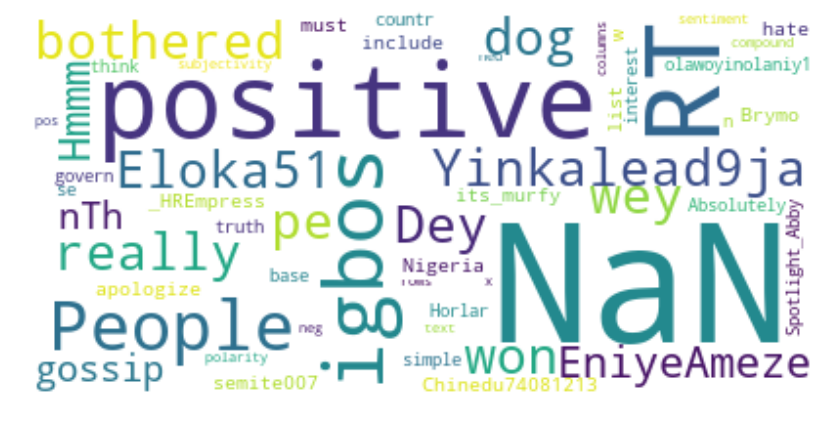

In [110]:
plt.figure(figsize=(14, 18))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [111]:
#Word cloud for negative words used
text3=tw_list_negative

In [114]:
wordcloud3=WordCloud(collocations=False, background_color='white').generate(str(text3))

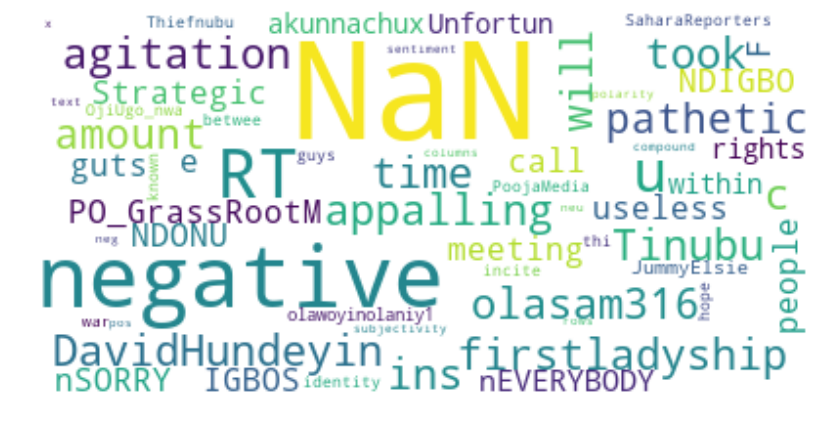

In [115]:
plt.figure(figsize=(14, 18))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

In [116]:
#Word cloud for negative words used
text4=tw_list_neutral

In [118]:
wordcloud4=WordCloud(collocations=False, background_color='white').generate(str(text4))

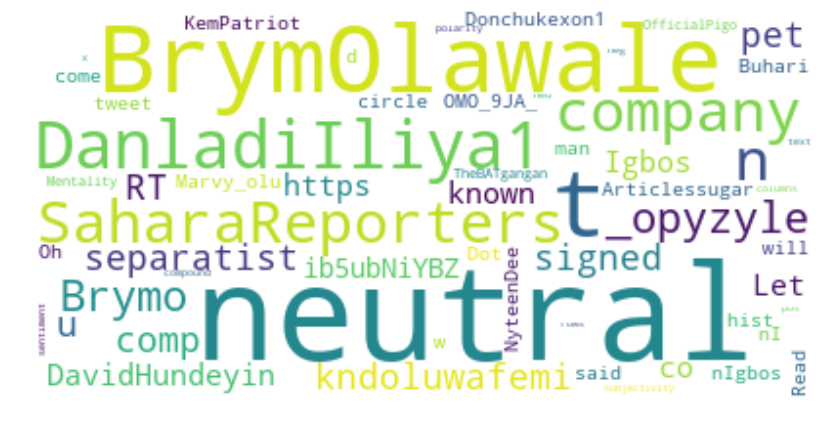

In [119]:
plt.figure(figsize=(14, 18))
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.show()

## A COMPLETE SENTIMENT ANALYSIS OF TWEETS THAT HAD TO DO WITH THE IGBOS AND THE CONTROVERSIES SURROUNDING THE STATEMENT MADE BY BRYMO OLAWALE. THE ANALYSIS WAS CARRIED OUT BY ADENIRAN MICHAEL DOTUN.